<a href="https://colab.research.google.com/github/rivalsolmons/BTP/blob/main/Effort_Fl_dataset_1_Zia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effort and cost Estimation in Agile Software Development

In [183]:
#@title Cost Estimation on Zia 
import math
import pandas as pd
import numpy as np

from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report



In [184]:
from google.colab import drive
drive.mount('/content/drive')

data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/Zia_upd2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
data_read.head()

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,156,4.2,0.687,2.7,10,22,230000,63,1200000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
3,331,4.5,0.886,3.8,10,22,300000,86,2100000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [186]:
#@title Improving The data Qualitity 
#@markdown  

In [187]:
#@title Defining Category 1 and Category 2


features = ['Actual_Cost'	,'Vi',	'D',	'V',		'Work_days',	'Team_Salary',	'Act_Time']
#features = ['Actual_Cost',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Act_Time'] 



Cat_1 = data_read[features]
Cat_2 = data_read['Effort']

In [188]:

#@title Describing Categorical Data 
Cat_1.describe()


,Actual_Cost,Vi,D,V,Work_days,Team_Salary,Act_Time
count,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.114286e+06,4.071429,0.780381,3.023810,21.952381,246190.476190,56.428571
std,7.058936e+05,0.325796,0.071028,0.438069,0.218218,46419.413016,26.177417
min,3.500000e+05,3.700000,0.646000,2.400000,21.000000,190000.000000,21.000000
25%,6.000000e+05,3.900000,0.742000,2.800000,22.000000,220000.000000,35.000000
50%,8.000000e+05,4.000000,0.758000,2.900000,22.000000,250000.000000,52.000000
75%,1.500000e+06,4.200000,0.833000,3.200000,22.000000,250000.000000,80.000000
max,3.200000e+06,4.900000,0.903000,4.200000,22.000000,400000.000000,112.000000


In [189]:
#For debugging purpose
#print(Cat_1)

In [190]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,Actual_Cost,Vi,D,V,Work_days,Team_Salary,Act_Time
0,1200000,4.2,0.687,2.7,22,230000,63
1,1600000,3.7,0.701,2.5,21,260000,92
2,1000000,4.0,0.878,3.3,22,250000,56
3,2100000,4.5,0.886,3.8,22,300000,86
4,750000,4.9,0.903,4.2,22,300000,32
5,3200000,4.1,0.903,3.6,22,400000,91
6,600000,4.2,0.859,3.4,22,250000,35
7,1800000,3.8,0.833,3.0,22,250000,93
8,500000,3.9,0.646,2.4,22,190000,36
9,1200000,4.6,0.758,3.2,22,250000,62


In [191]:
print('The overall nummber of projects are: ',len(Cat_2))

The overall nummber of projects are:  21


In [192]:
display(Cat_2)

0     156
1     202
2     173
3     331
4     124
5     339
6      97
7     257
8      84
9     211
10    131
11    112
12    101
13     74
14     62
15    289
16    113
17    141
18    213
19    137
20     91
Name: Effort, dtype: int64

In [193]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [194]:
import math
print(y_test)


8      84
13     74
20     91
1     202
11    112
Name: Effort, dtype: int64


In [195]:
print(y_pred1)

[ 74.4768229   80.91188029  75.77505591 205.70522813 113.86072133]


In [196]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

Text(0.5, 1.0, 'Cost Actual vs Predicted Linear Regresssion')

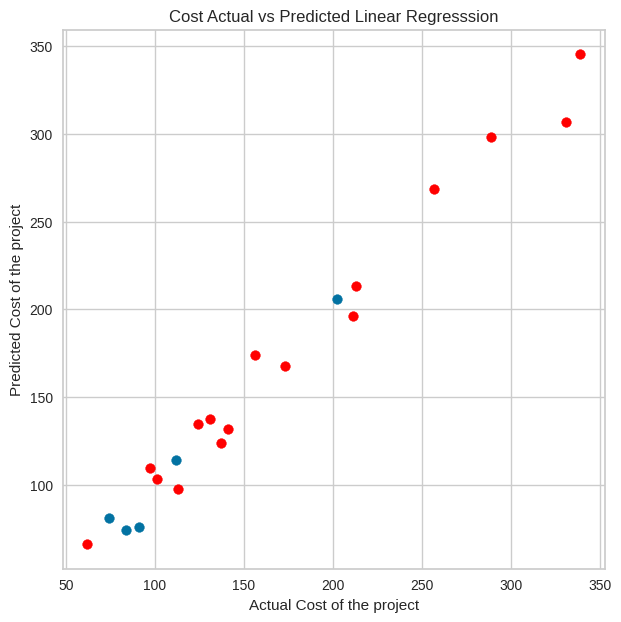

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Cost of the project')
plt.ylabel('Predicted Cost of the project')
plt.title('Cost Actual vs Predicted Linear Regresssion')




In [198]:
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [199]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred1%10**5,'Difference':y_test-y_pred1})



pred_y_diff[0:21]


,Actual Values of Cost,Predicted Cost,Difference
8,84,74.476823,9.523177
13,74,80.911880,-6.911880
20,91,75.775056,15.224944
1,202,205.705228,-3.705228
11,112,113.860721,-1.860721


In [200]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [201]:

print(arr)

    Actual  Cost
8             84
13            74
20            91
1            202
11           112


In [202]:
print(y_pred1)


[ 74.4768229   80.91188029  75.77505591 205.70522813 113.86072133]


In [203]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred1))

diff=np.absolute(y_test-y_pred1)
MRE=np.absolute(diff)/y_test
MMRE=np.mean(MRE)


Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
MRE=(diff/y_test)/MRE.size

MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
P2=MRE[MRE<MMRE]

Pred=(P.size/MRE.size) * 100
Pred2=(P2.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)


#linear

The r Score on the predictrd trained Set: 0.96
MMRE 0.016361532737116775
MdMRE 0.01868075754426117
PRED 25% 100.0
PRED MMRE 40.0
Model Accuracy 91.81923363144162


In [204]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=2, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

print(len(y_pred))
print("Mean Absolute error:::",mean_absolute_error(y_test,y_pred))
#print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred)))


# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred))



#knn

5
Mean Absolute error::: 15.3
The r Score on the predictrd trained Set: 0.85


<function matplotlib.pyplot.show(close=None, block=None)>

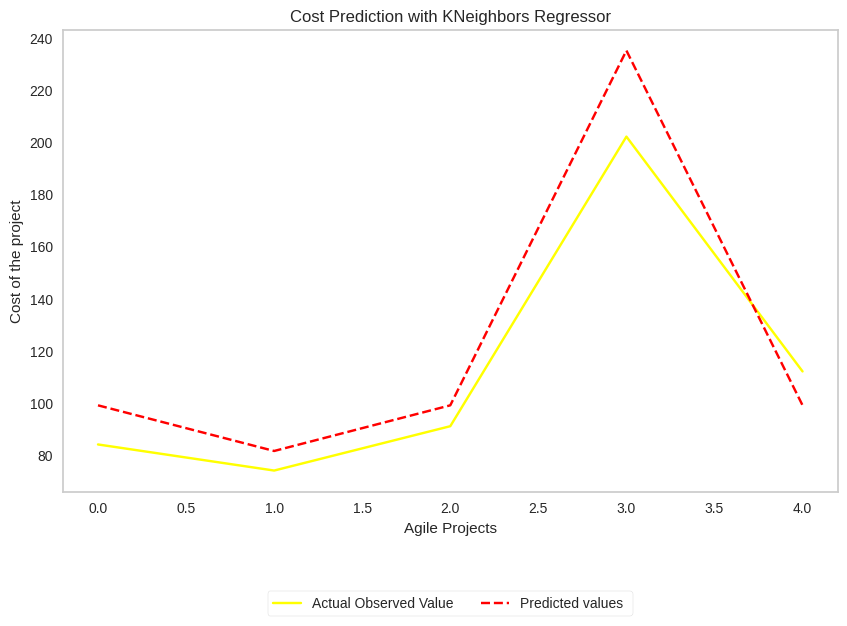

In [205]:
 #plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost of the project')
plt.title('Cost Prediction with KNeighbors Regressor')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [206]:
#
diff=np.absolute(y_test-y_pred)
MRE=diff/y_test
MRE=(diff/y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

MMRE 0.02589090532159839
MdMRE 0.023214285714285715
PRED 25% 100.0


In [207]:
import pandas as pd

pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'Difference':y_test-y_pred})
xyy=pred_y_diff.Difference.abs()
pred_y_diff[0:21]

,Actual Values of Cost,Predicted Cost,Difference
8,84,99.0,-15.0
13,74,81.5,-7.5
20,91,99.0,-8.0
1,202,235.0,-33.0
11,112,99.0,13.0


In [208]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'MRE':(y_test-y_pred)/y_test})


pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
8,84,99.0,-0.178571
13,74,81.5,-0.101351
20,91,99.0,-0.087912
1,202,235.0,-0.163366
11,112,99.0,0.116071


----------------------------

Decision Tree Implementation

## Decision Tree Implementation 

In [209]:
data_read.head()

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,156,4.2,0.687,2.7,10,22,230000,63,1200000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
3,331,4.5,0.886,3.8,10,22,300000,86,2100000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [210]:
#Now to Prepare the Input and Output Features
X= data_read.drop(['Effort'],axis=1)
X.shape

(21, 8)

In [211]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [212]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [214]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [215]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)
y_test_pred_dt = regressor1.predict(X_test)



In [217]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [218]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))

diff=np.absolute(y_test-y_test_pred_dt)
MRE=(diff/y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
P2=MRE[MRE<MMRE]

Pred2=(P2.size/MRE.size) * 100
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)


The r Score on the predictrd trained Set: 0.66
MMRE 0.03379698951481129
MdMRE 0.032432432432432434
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 91.81923363144162


<function matplotlib.pyplot.show(close=None, block=None)>

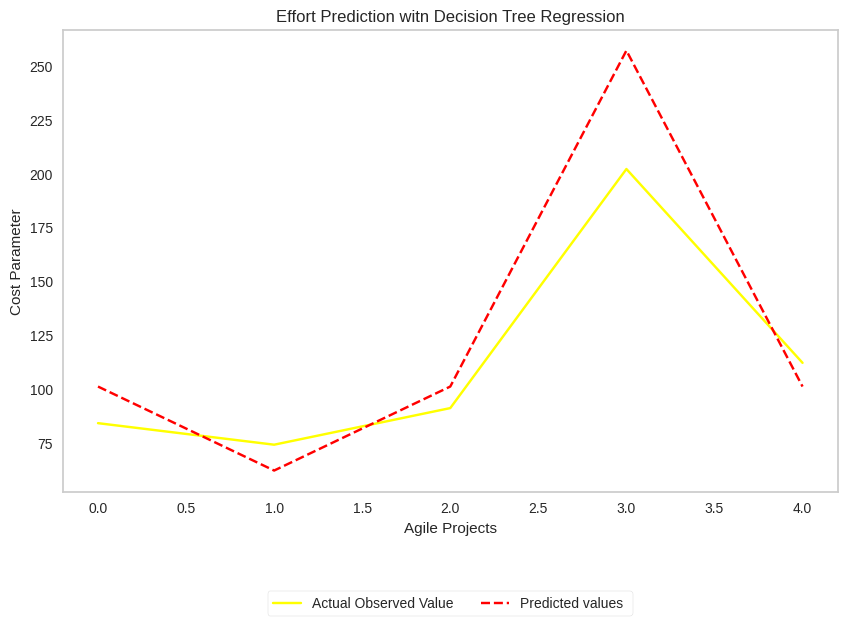

In [219]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost Parameter')
plt.title('Effort Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

<Axes: title={'center': 'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

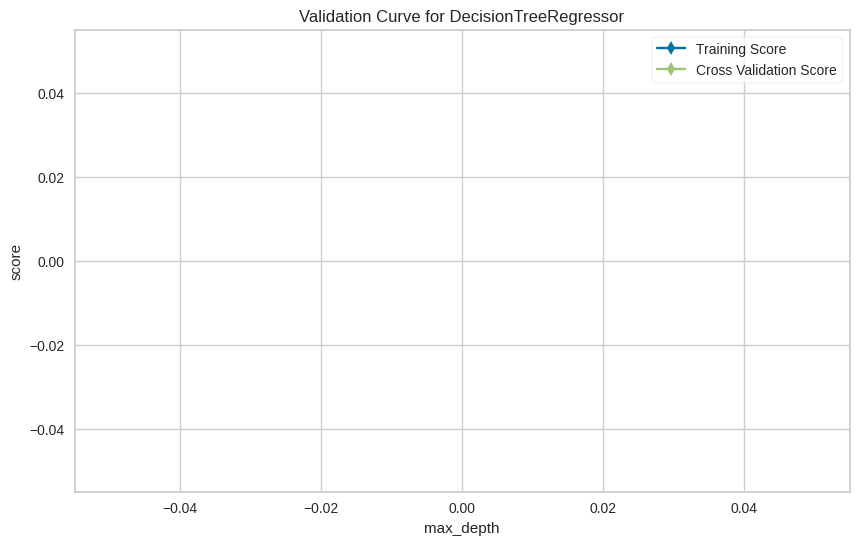

In [220]:
from yellowbrick.model_selection import ValidationCurve



# Creating the validation curve
import numpy as np
visualizer = ValidationCurve(DecisionTreeRegressor(), 
                             param_name="max_depth", n_jobs=-1,
                             param_range=np.arange(1, 22), 
                             cv=10, scoring="accuracy")

visualizer.fit(y_train, y_train_pred)

# Saving plot in PNG format
visualizer.show(outpath="Validation_Curve.png")

In [221]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Effort,Predicted Effort,MRE
8,84,101.0,-0.202381
13,74,62.0,0.162162
20,91,101.0,-0.109890
1,202,257.0,-0.272277
11,112,101.0,0.098214


In [222]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
8,84,101.0,-17.0
13,74,62.0,12.0
20,91,101.0,-10.0
1,202,257.0,-55.0
11,112,101.0,11.0


In [223]:
#@title Random Forest Regresssor Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [224]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [225]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [226]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [227]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

The Model Score on the predictrd training Set: 0.98
r2 Score  0.7232651014191247


In [228]:
# print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
# print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
# xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
# print("Root Mean Squared Error::",xv)

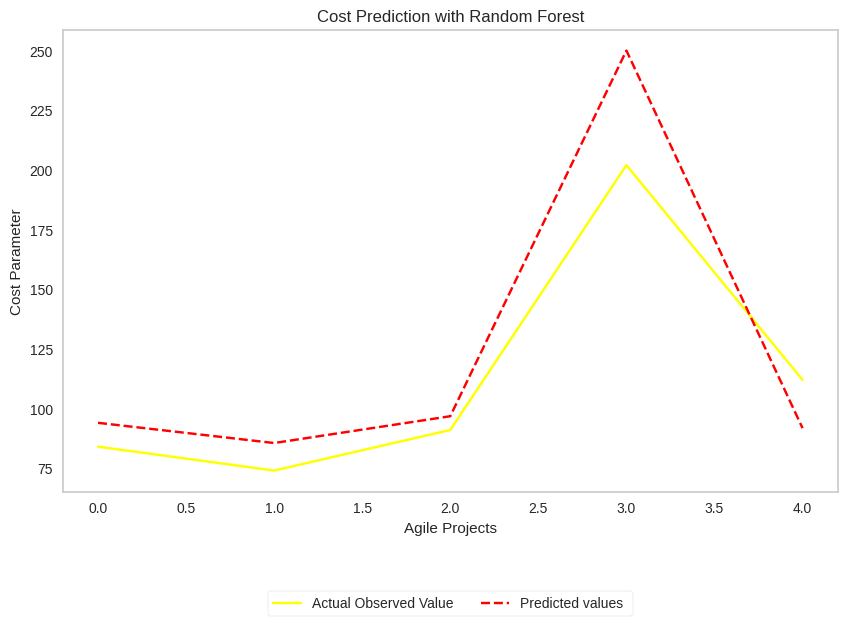

In [229]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost Parameter')
plt.title('Cost Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [230]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
8,84,94.000000,-0.119048
13,74,85.533333,-0.155856
20,91,96.766667,-0.063370
1,202,250.000000,-0.237624
11,112,91.766667,0.180655


Evaluation Parameters

In [231]:

# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_rf))
diff=np.absolute(y_test-y_test_pred_rf)
MRE=diff/y_test


MRE=(diff/y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)
#

The r Score on the predictrd trained Set: 0.72
MMRE 0.03026207850217751
MdMRE 0.031171171171171165
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 96.97379214978224


In [232]:
#@title ADA BOOST
from sklearn.ensemble import AdaBoostRegressor


# Categorical To continious 
X_train_ada,X_test_ada,y_train_ada,y_test_ada = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


ada = AdaBoostRegressor()
ada.fit(X_train_ada,y_train_ada)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)
y_train_pred_ada=ada.predict(X_train_ada)
y_pred_ada=ada.predict(X_test_ada)



# The r_sq
print('The r Score on the predictrd test Set: %.2f'% r2_score(y_test_ada,y_pred_ada))
#print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_train_ada,y_train_pred_ada))

diff=np.absolute(y_test_ada-y_pred_ada)
# MRE=diff/y_test
MRE=(diff/y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)
#


The r Score on the predictrd test Set: 0.62
MMRE 0.039742935460757245
MdMRE 0.04047619047619048
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 96.02570645392426


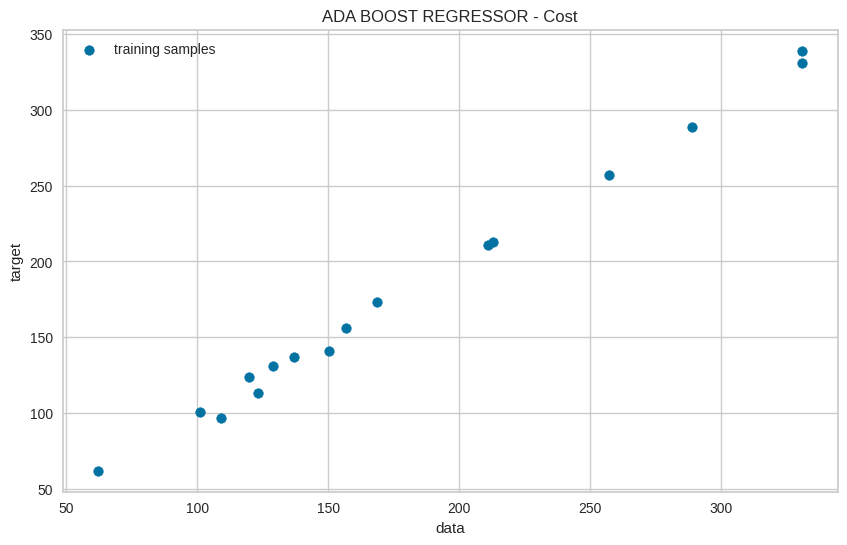

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")
# X_train_ada,X_test_ada,y_train_ada,y_test_ada
plt.figure()
plt.scatter(y_train_pred_ada,y_train_ada , label="training samples")
#plt.plot(X_test_ada,y_test_ada, color=colors[1], label="n_estimators=1", linewidth=2)
# plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("ADA BOOST REGRESSOR - Cost")
plt.legend()
plt.show()

In [234]:
#prediction on testing the data
#y_test_pred_svm = y_pred111.predict(y_test,y_test_pred_svm)

In [235]:
#@title Ensemble Learning 

data_read.head()

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,156,4.2,0.687,2.7,10,22,230000,63,1200000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
3,331,4.5,0.886,3.8,10,22,300000,86,2100000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [236]:
from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# data_read['Actual_Cost'] = encoder.fit_transform(data_read['Actual_Cost'])

In [237]:
dff = data_read.sample(21)
dff_train = dff.iloc[:14,:].sample(10)
dff_val = dff.iloc[14:18,:].sample(4)
dff_test = dff.iloc[17:,:].sample(3)

In [238]:
dff_train

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
10,131,4.6,0.758,3.2,10,22,250000,45,800000
13,74,3.9,0.773,2.9,10,22,200000,30,400000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
12,101,3.9,0.773,2.9,10,22,200000,32,600000
19,137,3.7,0.758,2.7,10,22,220000,56,800000
9,211,4.6,0.758,3.2,10,22,250000,62,1200000
17,141,4.0,0.742,2.8,10,22,250000,52,1000000
8,84,3.9,0.646,2.4,10,22,190000,36,500000
16,113,4.0,0.742,2.8,10,22,250000,39,800000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [239]:
X_test = dff_val.iloc[:,0:8].values
y_test = dff_val.iloc[:-1].values

# len(X_test)
# len(y_test)


In [240]:
#@title Bagging with 3 Decision Trees 
df_bag = dff_train.sample(7,replace=True) 

X= df_bag.iloc[:,0:8]
Y= df_bag.iloc[:,-1]

df_bag

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
4,124,4.9,0.903,4.2,10,22,300000,32,750000
19,137,3.7,0.758,2.7,10,22,220000,56,800000
13,74,3.9,0.773,2.9,10,22,200000,30,400000
9,211,4.6,0.758,3.2,10,22,250000,62,1200000
10,131,4.6,0.758,3.2,10,22,250000,45,800000
17,141,4.0,0.742,2.8,10,22,250000,52,1000000
9,211,4.6,0.758,3.2,10,22,250000,62,1200000


In [241]:
X

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time
4,124,4.9,0.903,4.2,10,22,300000,32
19,137,3.7,0.758,2.7,10,22,220000,56
13,74,3.9,0.773,2.9,10,22,200000,30
9,211,4.6,0.758,3.2,10,22,250000,62
10,131,4.6,0.758,3.2,10,22,250000,45
17,141,4.0,0.742,2.8,10,22,250000,52
9,211,4.6,0.758,3.2,10,22,250000,62


In [242]:
Y

4      750000
19     800000
13     400000
9     1200000
10     800000
17    1000000
9     1200000
Name: Actual_Cost, dtype: int64

In [243]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score 

In [244]:
def evaluate(clf,X,Y):
  clf.fit(X,Y)
  plot_tree(clf)
  plt.show()
  # plot_decision_regions(X.values,Y.values, clf=clf , legend=2)
  y_pred=clf.predict(X_test)
  y_pred
  #print(accuracy_score(y_test,y_pred))

In [245]:
#@title Default title text
dt_bag1 = DecisionTreeRegressor()
dt_bag11 = DecisionTreeClassifier()
#

We're adding out Bag 1 to make a low bias and high variance model

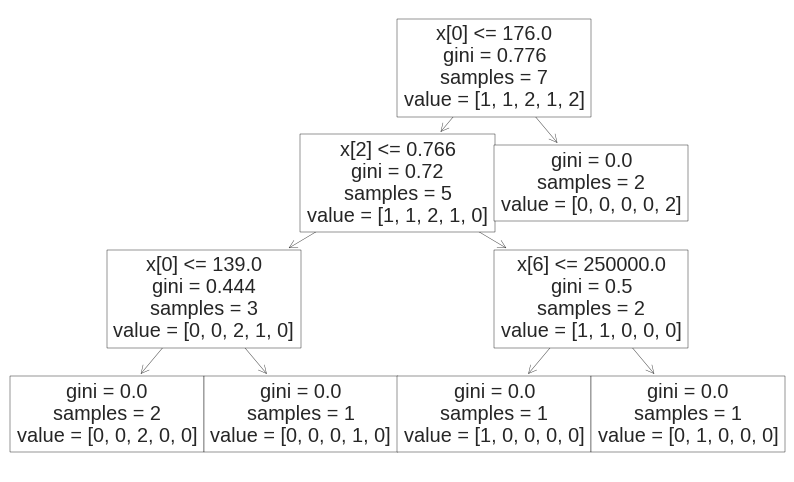

In [246]:
# Decision tree Classifier 

evaluate(dt_bag11,X,Y)

In [247]:
#accuracy_score(y_pred,y_test)

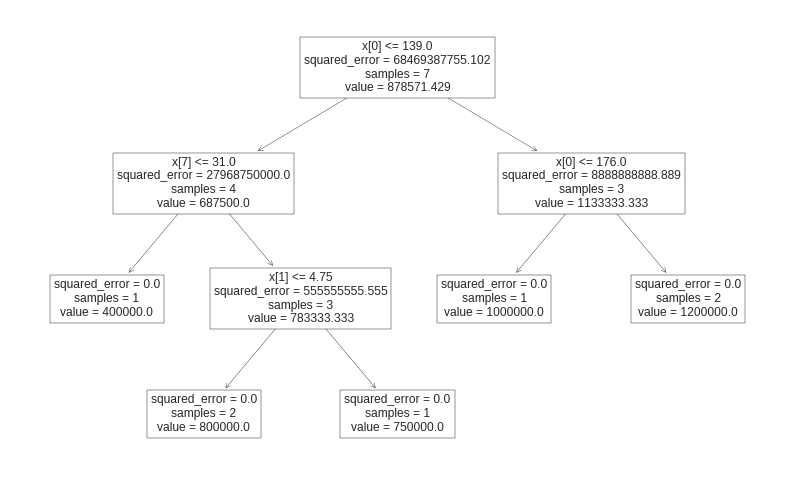

In [248]:
evaluate(dt_bag1,X,Y)

In [249]:
#@title Bagging with 3 Decision Trees 
df_bag = dff_train.sample(7,replace=True) 

X= df_bag.iloc[:,0:8]
Y= df_bag.iloc[:,-1]

df_bag

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
4,124,4.9,0.903,4.2,10,22,300000,32,750000
12,101,3.9,0.773,2.9,10,22,200000,32,600000
16,113,4.0,0.742,2.8,10,22,250000,39,800000
10,131,4.6,0.758,3.2,10,22,250000,45,800000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
16,113,4.0,0.742,2.8,10,22,250000,39,800000
8,84,3.9,0.646,2.4,10,22,190000,36,500000


In [250]:
X

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time
4,124,4.9,0.903,4.2,10,22,300000,32
12,101,3.9,0.773,2.9,10,22,200000,32
16,113,4.0,0.742,2.8,10,22,250000,39
10,131,4.6,0.758,3.2,10,22,250000,45
2,173,4.0,0.878,3.3,10,22,250000,56
16,113,4.0,0.742,2.8,10,22,250000,39
8,84,3.9,0.646,2.4,10,22,190000,36


In [252]:
#@title Bagging with 3 Decision Trees 2nd Bag
df_bag2 = dff_train.sample(7,replace=True) 

X= df_bag2.iloc[:,0:8]
Y= df_bag2.iloc[:,-1]

df_bag

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
4,124,4.9,0.903,4.2,10,22,300000,32,750000
12,101,3.9,0.773,2.9,10,22,200000,32,600000
16,113,4.0,0.742,2.8,10,22,250000,39,800000
10,131,4.6,0.758,3.2,10,22,250000,45,800000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
16,113,4.0,0.742,2.8,10,22,250000,39,800000
8,84,3.9,0.646,2.4,10,22,190000,36,500000


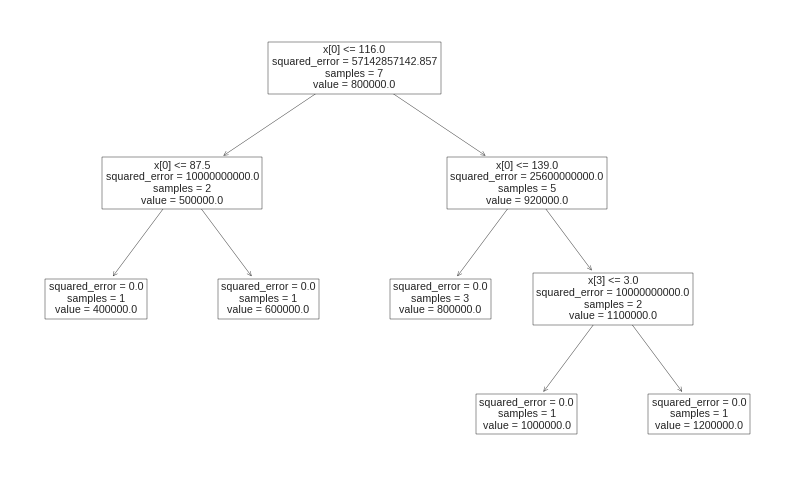

In [253]:
dt_bag2 = DecisionTreeRegressor()
evaluate(dt_bag2,X,Y)

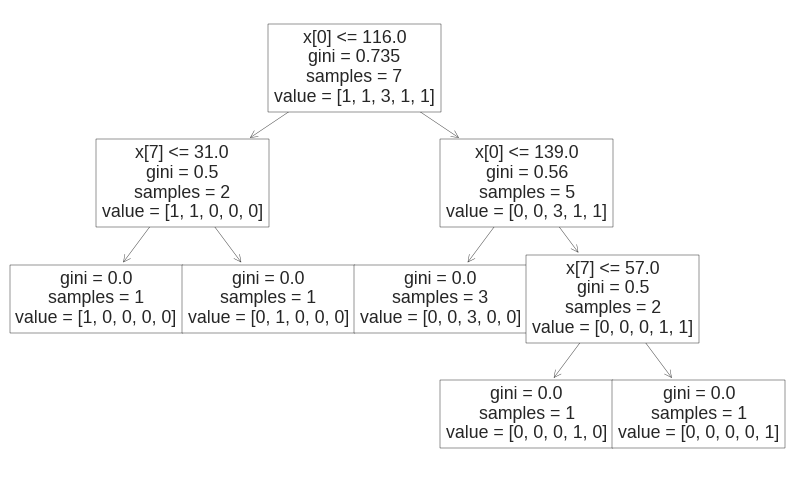

In [254]:
dt_bag22 = DecisionTreeClassifier()
evaluate(dt_bag22,X,Y)

In [255]:
#@title Bagging with 3 Decision Trees 3rd Bag
df_bag3 = dff_train.sample(7,replace=True) 

X= df_bag3.iloc[:,0:8]
Y= df_bag3.iloc[:,-1]

df_bag3

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
16,113,4.0,0.742,2.8,10,22,250000,39,800000
13,74,3.9,0.773,2.9,10,22,200000,30,400000
8,84,3.9,0.646,2.4,10,22,190000,36,500000
17,141,4.0,0.742,2.8,10,22,250000,52,1000000
4,124,4.9,0.903,4.2,10,22,300000,32,750000
13,74,3.9,0.773,2.9,10,22,200000,30,400000
16,113,4.0,0.742,2.8,10,22,250000,39,800000


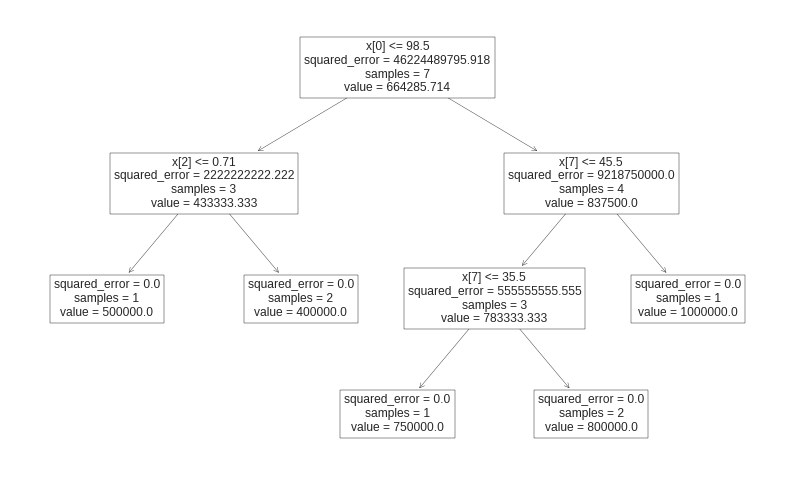

In [256]:
df_bag3 = DecisionTreeRegressor()
evaluate(df_bag3,X,Y)

In [257]:
from sklearn.ensemble import BaggingRegressor
X_train,X_test,Y_train,Y_test = train_test_split(Cat_1,Cat_2,test_size=0.25,random_state=0)

# now printing the overall sizes of our splitted result
print("Train / Test Sets sizes: ", x_train.shape,x_test.shape,y_train.shape,y_test.shape )

Train / Test Sets sizes:  (16, 7) (5, 7) (16,) (3, 9)


In [258]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, df_bag3,df_bag2,df_bag],
          'n_estimators': [10,15,21],
          'max_samples': [0.25,0.5],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=2, n_jobs=-1, verbose=1)
import warnings
warnings.filterwarnings('ignore')
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))

print('Overall R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 2 folds for each of 192 candidates, totalling 384 fits
Train R^2 Score : 0.935
Overall R^2 Score : 0.940
Best Parameters :  {'base_estimator': None, 'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 15}
CPU times: user 290 ms, sys: 14.4 ms, total: 304 ms
Wall time: 5.9 s


In [259]:
result=bagging_regressor_grid.predict(Cat_1) 
result

array([177.4       , 209.7       , 175.33333333, 297.73333333,
       158.        , 311.4       , 112.8       , 237.5       ,
        98.3       , 187.86666667, 125.33333333,  99.1       ,
        99.36666667,  94.43333333,  89.23333333, 262.6       ,
       128.13333333, 159.46666667, 226.46666667, 129.1       ,
       112.5       ])

In [260]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)


In [261]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV  On Multiple Decision Trees

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
# MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)

MMRE 0.029306077946439593
MdMRE 0.028541666666666667
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 97.06939220535604


In [262]:
#@title Using Ensemble Technique 1st set of Algorithms

# 1
from sklearn.ensemble import BaggingRegressor



In [263]:
X_train,X_test,Y_train,Y_test = train_test_split(Cat_1,Cat_2,test_size=0.25,random_state=0)

# now printing the overall sizes of our splitted result
print("Train / Test Sets sizes: ", x_train.shape,x_test.shape,y_train.shape,y_test.shape )

Train / Test Sets sizes:  (16, 7) (5, 7) (16,) (3, 9)


In [264]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [265]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [266]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [267]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.9537808682088416
R^2 score for DT 0.22646916857728983
R^2 score for KNN 0.8088319053939906


In [268]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [303]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))


Training Coefficient of R^2 : 0.972


In [270]:
from sklearn.linear_model import Lasso

In [271]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,0.95],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=2, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Final R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 2 folds for each of 144 candidates, totalling 288 fits
Train R^2 Score : 0.876
Test R^2 Score : 0.890
Final R^2 Score : 0.895
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}
CPU times: user 249 ms, sys: 11.9 ms, total: 261 ms
Wall time: 8.28 s


In [272]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)


In [273]:
result=bagging_regressor_grid.predict(Cat_1) 
result

array([196.42859088, 207.92185761, 160.12475399, 331.63533177,
       157.42957841, 431.02658921, 113.66217498, 261.53913654,
        97.72423853, 212.16468276, 153.3721731 , 127.66234817,
       121.56357967,  89.34057045,  84.98134312, 289.93187358,
       123.12182102, 150.56109204, 221.11625339, 119.58185816,
        87.34847452])

In [274]:
Y_train_pred_BAGGING

array([ 84.98134312, 221.11625339, 113.66217498, 119.58185816,
       157.42957841, 160.12475399, 431.02658921, 123.12182102,
       212.16468276, 261.53913654, 150.56109204, 331.63533177,
       196.42859088, 289.93187358, 121.56357967])

In [275]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
# MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)

MMRE 0.02085427555704712
MdMRE 0.025268848859996203
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 97.91457244429529


In [276]:
#@title Third Approach Using Ensemble Learning - Bagging with use of Bootstrapping 

 


In [277]:
#@title Using Ensemble Technique Second set of Algorithms
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import KBinsDiscretizer

In [278]:
X_train,X_test,Y_train,Y_test = train_test_split(Cat_1,Cat_2,test_size=0.30,random_state=0)

# now printing the overall sizes of our splitted result
print("Train / Test Sets sizes: ", x_train.shape,x_test.shape,y_train.shape,y_test.shape )

Train / Test Sets sizes:  (16, 7) (5, 7) (16,) (3, 9)


In [279]:
rkf = RandomForestRegressor()
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor()

In [280]:
from logging import addLevelName
rkf.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
ada.fit(X_train,Y_train)

AdaBoostRegressor()

In [281]:
y_pred1 = rkf.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = ada.predict(X_test)

In [282]:
print("R^2 score for RF",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for ADA_B",r2_score(Y_test,y_pred3))

R^2 score for RF 0.5905305592543275
R^2 score for DT 0.5480840361000148
R^2 score for ADA_B 0.5022850191514194


In [283]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [284]:
Y_preds = bag_regressor.predict(X_test)

print('Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
# print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Coefficient of R^2 : 0.972


In [304]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor(),DecisionTreeRegressor()],
          'n_estimators': [10,14,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))

print('Overall R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Train R^2 Score : 0.918
Overall R^2 Score : 0.930
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 14}
CPU times: user 552 ms, sys: 52.8 ms, total: 605 ms
Wall time: 19.7 s


In [305]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [306]:
result=bagging_regressor_grid.predict(Cat_1) 
result

array([179.02488588, 235.94879614, 167.47176606, 289.57122618,
       144.4371761 , 391.13167171, 120.30860531, 256.76967636,
        95.2029998 , 185.34519994, 140.32944398, 115.0204702 ,
       107.16984658,  89.68936054,  78.74495726, 284.69458929,
       132.63153331, 158.6199134 , 220.11036152, 142.01136289,
       105.85202444])

In [307]:
Y_train_pred_BAGGING

array([220.11036152, 120.30860531, 142.01136289, 144.4371761 ,
       167.47176606, 391.13167171, 132.63153331, 185.34519994,
       256.76967636, 158.6199134 , 289.57122618, 179.02488588,
       284.69458929, 107.16984658])

In [308]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
#MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)

MMRE 0.021325008312617053
MdMRE 0.02331557996700096
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 97.86749916873829


In [290]:
#@title Ensemble 

In [291]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))

print('Overall R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.929
Overall R^2 Score : 0.937
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 15}
CPU times: user 370 ms, sys: 25.1 ms, total: 395 ms
Wall time: 10.7 s


In [292]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Overall R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.929
Test R^2 Score : 0.846
Overall R^2 Score : 0.937
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 15}
CPU times: user 376 ms, sys: 20.7 ms, total: 397 ms
Wall time: 11.6 s


In [293]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [294]:
result=bagging_regressor_grid.predict(Cat_1) 
result

array([180.79363206, 239.60124921, 167.21559053, 291.56787284,
       143.17669243, 385.94290479, 118.3646554 , 259.75064321,
        93.87262738, 188.19689689, 141.55144306, 112.64133004,
       103.95209655,  87.09218233,  74.42583332, 291.87778846,
       130.06729169, 157.86427355, 222.88247325, 142.12002107,
       102.65096909])

In [295]:
Y_train_pred_BAGGING

array([222.88247325, 118.3646554 , 142.12002107, 143.17669243,
       167.21559053, 385.94290479, 130.06729169, 188.19689689,
       259.75064321, 157.86427355, 291.56787284, 180.79363206,
       291.87778846, 103.95209655])

In [296]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
#MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)

MMRE 0.018271801654423953
MdMRE 0.018290375330236714
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 98.1728198345576


In [297]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'estimator': [RandomForestRegressor(), DecisionTreeRegressor(), AdaBoostRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,8],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=2, n_jobs=-1, verbose=1)
import warnings
warnings.filterwarnings('ignore')
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
#print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Overall R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 2 folds for each of 144 candidates, totalling 288 fits
Train R^2 Score : 0.989
Overall R^2 Score : 0.948
Best Parameters :  {'bootstrap': False, 'bootstrap_features': False, 'estimator': AdaBoostRegressor(), 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 15}
CPU times: user 1.06 s, sys: 72.5 ms, total: 1.14 s
Wall time: 1min 33s


In [298]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [299]:
result=bagging_regressor_grid.predict(Cat_1) 
result

array([162.29031746, 225.47407407, 168.97190476, 331.        ,
       123.82222222, 335.26666667, 107.42539683, 255.42962963,
       117.5005291 , 207.11111111, 134.54444444, 110.44206349,
       111.25873016, 111.25873016, 111.25873016, 277.59259259,
       131.63481481, 157.02338624, 211.16666667, 137.85238095,
       114.36349206])

In [300]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
#MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)

MMRE 0.04307601546078433
MdMRE 0.03667738157534075
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 95.69239845392157
